In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import seaborn as sns
import os
import pickle
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

import os
import psutil
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, log_loss
from sklearn.metrics import precision_recall_curve
from IPython.display import clear_output
import sys
sys.path.append("..")
from sklearn.linear_model import TheilSenRegressor
from copy import deepcopy      
from collections import Counter
import pandas as pd
EPS = 1e-6

In [3]:
import pandas as pd
from tqdm import tqdm_notebook

def digraph_to_csv(graphs: list):
    df = pd.DataFrame(columns=['brick_id', 'shower_id', 'SX', 'SY', 'SZ', 'TX', 'TY'])
    for i, graph in tqdm_notebook(enumerate(graphs)):
        nodes = graph.nodes()
        SX = [node['features']['SX'] for node in nodes.values()]
        SY = [node['features']['SY'] for node in nodes.values()]
        SZ = [node['features']['SZ'] for node in nodes.values()]
        TX = [node['features']['TX'] for node in nodes.values()]
        TY = [node['features']['TY'] for node in nodes.values()]
        shower_id = [node['signal'] for node in nodes.values()]
        brick_id = [i for _ in range(len(shower_id))]
        df = df.append(
            pd.DataFrame(
                {'brick_id': brick_id, 
                 'shower_id': shower_id, 
                 'SX': SX, 
                 'SY': SY, 
                 'SZ': SZ, 
                 'TX': TX, 
                 'TY': TY
                }
            )
        )
    return df
        

def csv_to_digraph(df: pd.DataFrame):
    bricks = []
    for name, group in df.groupby('brick_id'):
        print(group.shape)
        nodes_to_add = []

        for node_id, row in group.iterrows():
            nodes_to_add.append(
                (
                    node_id,
                    {
                        'features': {
                            'SX': row.SX,
                            'SY': row.SY,
                            'SZ': row.SZ,
                            'TX': row.TX,
                            'TY': row.TY,
                        },
                        'signal': row['shower_id']
                    }
                )
            )
        graphx = nx.DiGraph()
        graphx.add_nodes_from(nodes_to_add)
        bricks.append(graphx)
    return bricks


In [7]:
def plot_dataframe(data: pd.DataFrame, azim=-84, elev=10):
    """
    Function for plotting shower
    """
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Line3DCollection
    import matplotlib.pyplot as plt
    x0, y0, z0 = data.SX.values, data.SY.values, data.SZ.values
    sx, sy = data.TX.values, data.TY.values

    x1 = x0 + dZ * sx
    y1 = y0 + dZ * sy
    z1 = z0 + dZ
    
    start_points = np.array([z0, y0, x0]).T.reshape(-1, 3)
    end_points = np.array([z1, y1, x1]).T.reshape(-1, 3)

    C = plt.cm.Blues(0.9)
    lc = Line3DCollection(list(zip(start_points, end_points)), colors=C, alpha=0.9, lw=2)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=azim, elev=elev)
    ax.add_collection3d(lc)
    
    ax.set_xlabel("z")
    ax.set_ylabel("y")
    ax.set_zlabel("x") 
    ax.set_xlim(z0.min(), z1.max())
    ax.set_ylim(y0.min(), y1.max())
    ax.set_zlim(x0.min(), x1.max())
    
plt.show()

In [4]:
df = np.loadtxt('data/opera_train.data')
df = pd.DataFrame(df, columns=['brick_id', 'SX', 'SY', 'SZ', 'TX', 'TY'])

In [6]:
df[:10]

,brick_id,SX,SY,SZ,TX,TY
0,0.0,-10177.71,-8697.63,-24330.69,-0.1505,0.1620
1,0.0,-10375.19,-8490.78,-23056.31,-0.1585,0.1673
2,0.0,-10591.61,-8268.13,-21785.49,-0.1913,0.1805
3,0.0,-10827.50,-8042.95,-20510.45,-0.1643,0.2017
4,0.0,-11053.21,-7800.50,-19239.20,-0.2127,0.1621
5,0.0,-11326.55,-7598.38,-17965.81,-0.2367,0.0927
6,0.0,-11185.42,-7671.41,-17966.11,-0.1640,0.1471
7,0.0,-11190.76,-7662.80,-17967.00,-0.1659,0.1696
8,0.0,-11675.23,-7418.44,-16695.60,-0.3246,0.2886
9,0.0,-11389.86,-7451.95,-16690.97,-0.1632,0.1971


In [10]:
BRICK_X_MIN = 0.
BRICK_X_MAX = 103000. # 10.3 cm
BRICK_Y_MIN = 0.
BRICK_Y_MAX = 128000. # 12.8 cm
SAFE_M = 3000.
dZ = 205. # 0.0205 cm emulsion
DISTANCE = 1293.



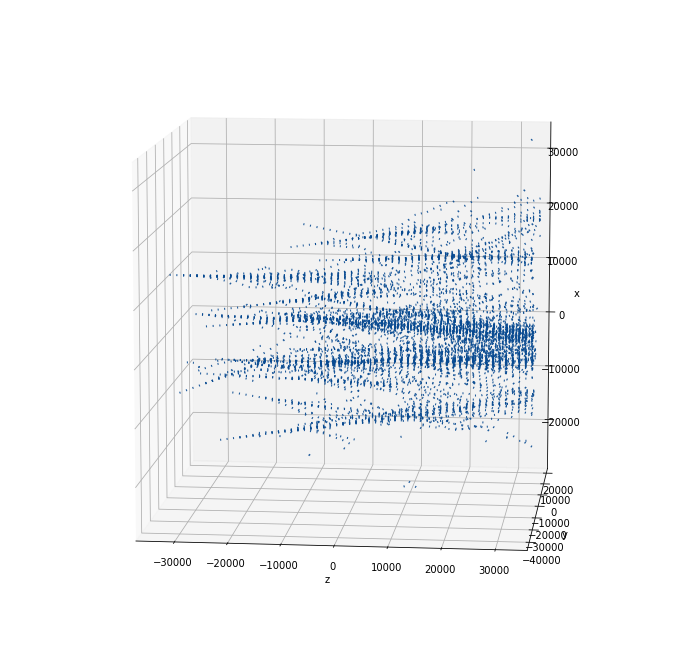

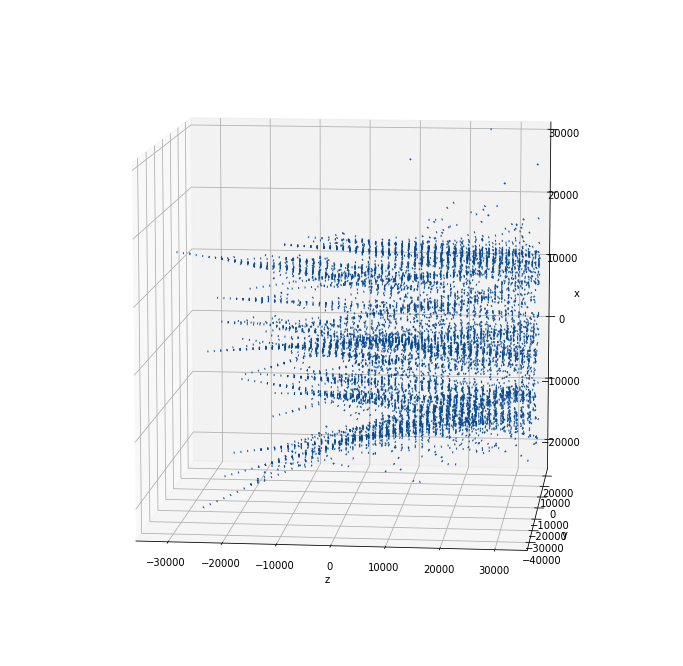

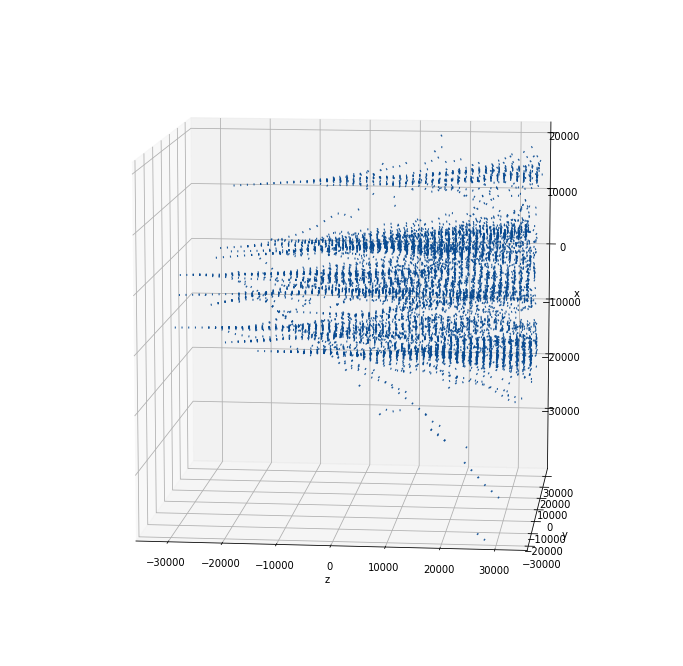

In [15]:
for i in range(3):
    plot_dataframe(df.loc[df.brick_id==i])

### Глобальные распределения

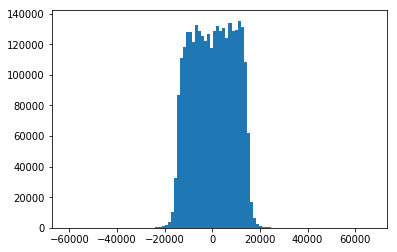

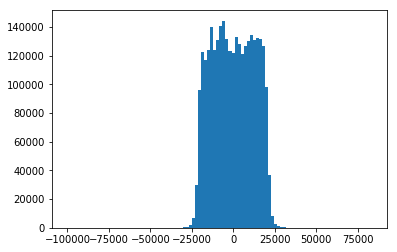

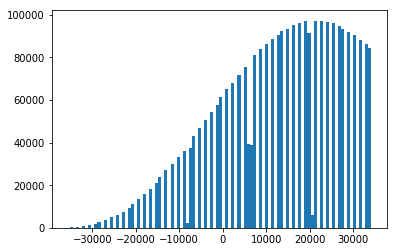

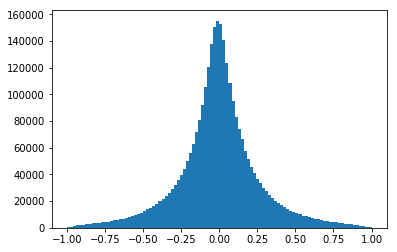

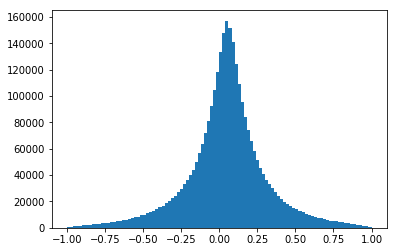

In [21]:
import matplotlib.pyplot as plt
plt.hist(df['SX'], bins=100)
plt.show()

plt.hist(df['SY'], bins=100)
plt.show()

plt.hist(df['SZ'], bins=100)
plt.show()

plt.hist(df['TX'], bins=100)
plt.show()

plt.hist(df['TY'], bins=100)
plt.show()

### Для одного ливня

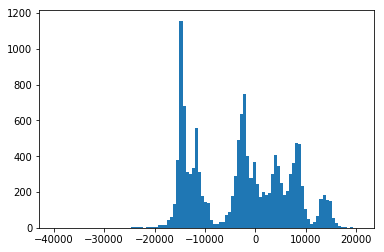

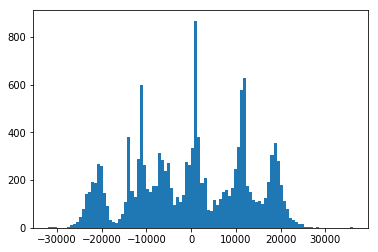

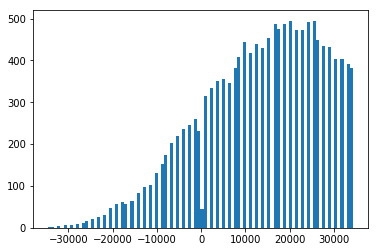

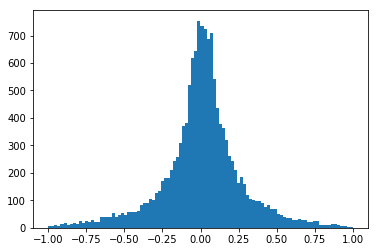

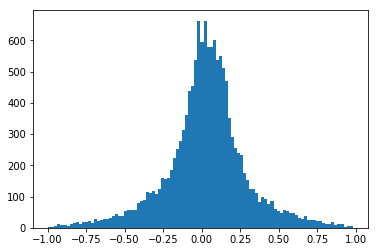

In [22]:
plt.hist(df[df.brick_id==i]['SX'], bins=100)
plt.show()

plt.hist(df[df.brick_id==i]['SY'], bins=100)
plt.show()

plt.hist(df[df.brick_id==i]['SZ'], bins=100)
plt.show()

plt.hist(df[df.brick_id==i]['TX'], bins=100)
plt.show()

plt.hist(df[df.brick_id==i]['TY'], bins=100)
plt.show()